In [1]:
#匯入模組
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 讀取數據
data = pd.read_csv('data/electricity.csv')

In [3]:
# 印出data的資料類型
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print("資料鍵值：",data.keys(),"\n")
print("資料大小：",data.shape,"\n")
print("溫度資料：","\n",data.temperature,"\n")
print("氣壓資料：","\n",data.pressure,"\n")
print("風速資料：","\n",data.windspeed,"\n")
print("用電量資料：","\n",data.electricity_consumption)

資料鍵值： Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption'],
      dtype='object') 

資料大小： (26496, 8) 

溫度資料： 
 0       -11.4
1       -12.1
2       -12.9
3       -11.4
4       -11.4
5       -10.7
6       -13.6
7       -11.4
8       -10.7
9       -10.0
10       -7.1
11       -7.9
12       -5.7
13       -6.4
14       -3.6
15       -5.0
16       -4.3
17       -7.1
18       -7.1
19       -6.4
20       -7.9
21       -6.4
22       -9.3
23      -10.0
24       -8.6
25       -7.9
26       -8.6
27      -10.7
28      -10.7
29       -8.6
         ... 
26466    -3.6
26467    -2.1
26468     0.0
26469    -5.7
26470    -3.6
26471    -5.7
26472    -2.9
26473    -6.4
26474    -2.9
26475    -8.6
26476    -7.1
26477    -6.4
26478    -8.6
26479    -7.1
26480    -6.4
26481    -2.9
26482    -2.1
26483    -2.9
26484    -1.4
26485     0.0
26486     0.7
26487     0.7
26488    -0.7
26489    -0.7
26490    -2.1
26491    -0.7
26492    -2.9
26493    -1.4
2

In [5]:
s = data[['temperature','pressure', 'windspeed','electricity_consumption']]
s.describe()

,temperature,pressure,windspeed,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000
mean,5.098989,986.450615,23.959956,298.359601
std,8.682860,12.002647,48.280321,108.020555
min,-17.100000,953.000000,1.075000,174.000000
25%,-2.900000,978.000000,3.155000,219.000000
50%,6.400000,986.000000,6.545000,267.000000
75%,12.100000,995.000000,22.260000,342.000000
max,23.600000,1024.000000,586.600000,1386.000000


In [6]:
# 搜尋特定的欄位，列出所有溫度、氣壓、風速、用電量資料大小
print("溫度資料大小：",data.temperature.shape)
print("氣壓資料大小：",data.pressure.shape)
print("風速資料大小：",data.windspeed.shape)
print("用電量資料大小：",data.electricity_consumption.shape)

溫度資料大小： (26496,)
氣壓資料大小： (26496,)
風速資料大小： (26496,)
用電量資料大小： (26496,)


In [7]:
#印出前5個數據
data.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


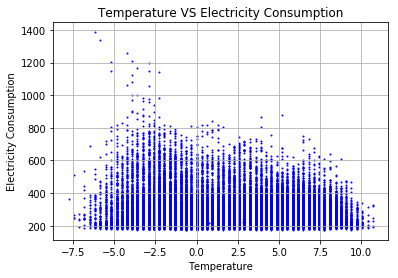

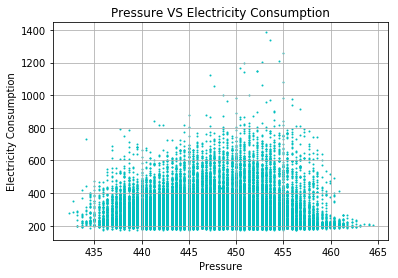

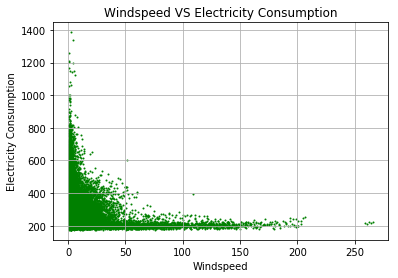

In [8]:
# 溫度、氣壓、風速分別和用電量關係之散佈圖
data['temperature'] = data['temperature'].apply(lambda x:0.453592*x)
data.plot.scatter(x='temperature', y='electricity_consumption',s=1,c='b')
plt.title('Temperature VS Electricity Consumption')
plt.xlabel('Temperature')
plt.ylabel('Electricity Consumption')
plt.grid(True)

data['pressure'] = data['pressure'].apply(lambda x:0.453592*x)
data.plot.scatter(x='pressure', y='electricity_consumption',s=1,c='c')
plt.title('Pressure VS Electricity Consumption')
plt.xlabel('Pressure')
plt.ylabel('Electricity Consumption')
plt.grid(True)

data['windspeed'] = data['windspeed'].apply(lambda x:0.453592*x)
data.plot.scatter(x='windspeed', y='electricity_consumption',s=1,c='g')
plt.title('Windspeed VS Electricity Consumption')
plt.xlabel('Windspeed')
plt.ylabel('Electricity Consumption')
plt.grid(True)

In [9]:
# 針對用電量設定類別
def get_consumption_category(wt):
    if wt < 200:
        return "<200kWh"
    elif 200 < wt < 400:
        return "200kWh~400kWh"
    elif 400 < wt < 600:
        return "400kWh~600kWh"
    elif 600 < wt < 800:
        return "600kWh~800kWh"
    elif 800 < wt < 1000:
        return "200kWh~400kWh"
    elif 1000 < wt < 1200:
        return "200kWh~400kWh"
    else:
        return ">1200kWh"
  
data["electricity_consumption_category"] = data["electricity_consumption"].map(get_consumption_category)
data

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,electricity_consumption_category
0,0,2013-07-01 00:00:00,-5.170949,-17.1,454.952776,259.413801,A,216.0,200kWh~400kWh
1,1,2013-07-01 01:00:00,-5.488463,-19.3,451.777632,260.833544,A,210.0,200kWh~400kWh
2,2,2013-07-01 02:00:00,-5.851337,-20.0,453.592000,262.373489,A,225.0,200kWh~400kWh
3,3,2013-07-01 03:00:00,-5.170949,-17.1,451.324040,264.253627,A,216.0,200kWh~400kWh
4,4,2013-07-01 04:00:00,-5.170949,-19.3,455.859960,266.077067,A,222.0,200kWh~400kWh
5,5,2013-07-01 05:00:00,-4.853434,-19.3,459.488696,1.265522,A,216.0,200kWh~400kWh
6,6,2013-07-01 06:00:00,-6.168851,-17.1,456.313552,1.986733,A,219.0,200kWh~400kWh
7,7,2013-07-01 07:00:00,-5.170949,-17.9,452.231224,3.463175,A,222.0,200kWh~400kWh
8,8,2013-07-01 08:00:00,-4.853434,-18.6,459.035104,5.468052,A,219.0,200kWh~400kWh
9,9,2013-07-01 09:00:00,-4.535920,-16.4,454.499184,8.153316,A,222.0,200kWh~400kWh


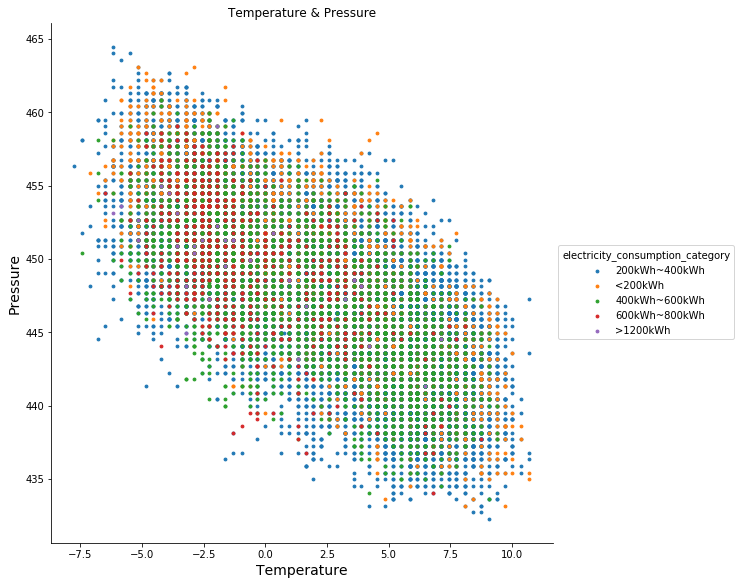

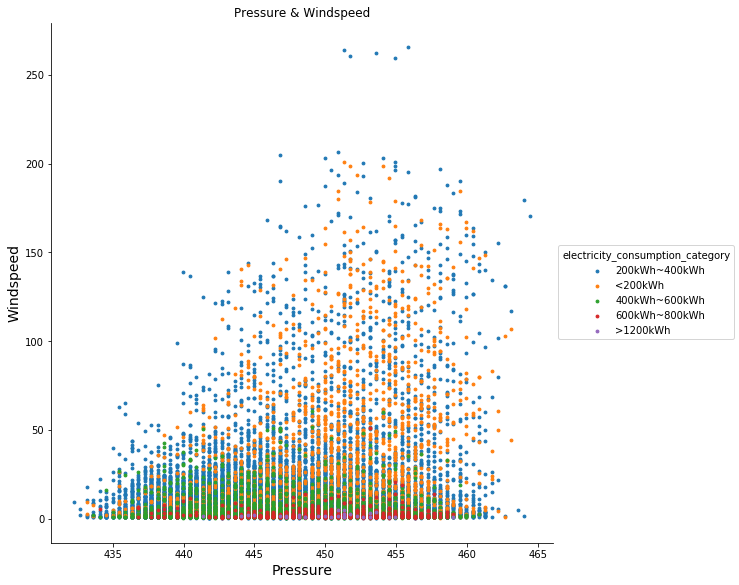

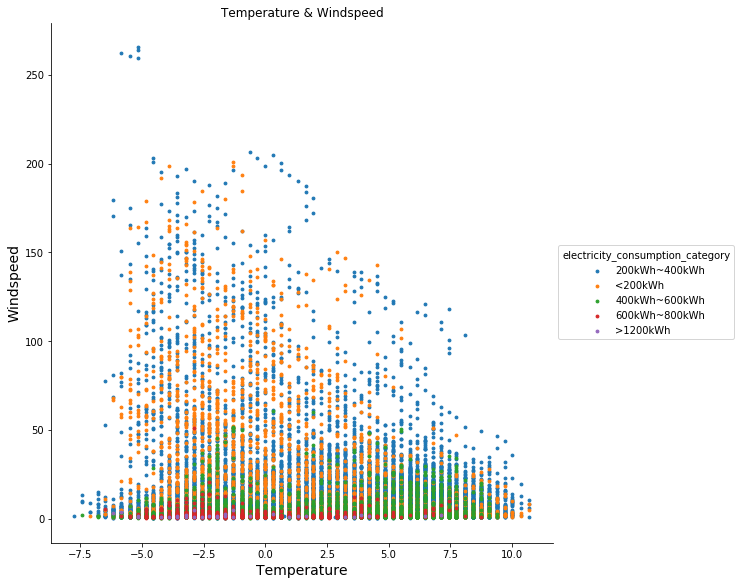

In [10]:
# 看出分類
sns.FacetGrid(data, hue="electricity_consumption_category", size=8).map(plt.scatter, "temperature", "pressure",s=8).add_legend()
plt.title("Temperature & Pressure")
plt.xlabel("Temperature",size=14)
plt.ylabel("Pressure",size=14)
plt.show()

sns.FacetGrid(data, hue="electricity_consumption_category", size=8).map(plt.scatter, "pressure", "windspeed",s=8).add_legend()
plt.title("Pressure & Windspeed")
plt.xlabel("Pressure",size=14)
plt.ylabel("Windspeed",size=14)
plt.show()

sns.FacetGrid(data, hue="electricity_consumption_category", size=8).map(plt.scatter, "temperature", "windspeed",s=8).add_legend()
plt.title("Temperature & Windspeed")
plt.xlabel("Temperature",size=14)
plt.ylabel("Windspeed",size=14)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

X1 = data[['temperature']].values
y1 = data['electricity_consumption'].values
slr = LinearRegression()
slr.fit(X1, y1)
print("Temperature VS Electricity Consumption")
print('Slope斜率: %.3f' % slr.coef_[0])
print('Intercept截距: %.3f' % slr.intercept_)
print('\n')
X2 = data[['pressure']].values
y2 = data['electricity_consumption'].values
slr = LinearRegression()
slr.fit(X2, y2)
print("Pressure VS Electricity Consumption")
print('Slope斜率: %.3f' % slr.coef_[0])
print('Intercept截距: %.3f' % slr.intercept_)
print('\n')
X3 = data[['windspeed']].values
y3 = data['electricity_consumption'].values
slr = LinearRegression()
slr.fit(X3, y3)
print("Windspeed VS Electricity Consumption")
print('Coefficients迴歸係數: %.3f' % slr.coef_[0])
print('Intercept截距: %.3f' % slr.intercept_)

Temperature VS Electricity Consumption
Slope斜率: -3.216
Intercept截距: 305.798


Pressure VS Electricity Consumption
Slope斜率: 0.018
Intercept截距: 290.311


Windspeed VS Electricity Consumption
Coefficients迴歸係數: -1.178
Intercept截距: 311.165


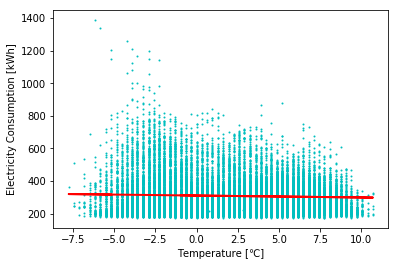

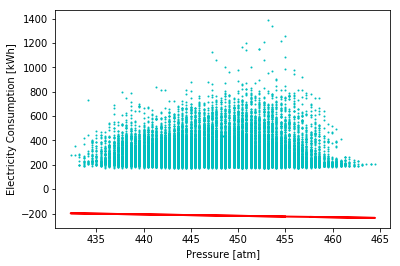

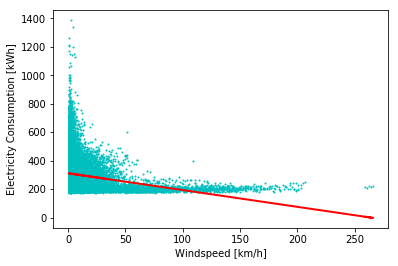

In [12]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='c',s=1)
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

lin_regplot(X1, y1, slr)
plt.xlabel('Temperature [℃]')
plt.ylabel('Electricity Consumption [kWh]')
plt.show()

lin_regplot(X2, y2, slr)
plt.xlabel('Pressure [atm]')
plt.ylabel('Electricity Consumption [kWh]')
plt.show()

lin_regplot(X3, y3, slr)
plt.xlabel('Windspeed [km/h]')
plt.ylabel('Electricity Consumption [kWh]')
plt.show()

In [13]:
# 用電量小於200
filter1 = data["electricity_consumption"] <= 200
a = data[filter1].shape[0]
print("用電量小於200kWh：",a)

# 用電量200~400
filter2 = data["electricity_consumption"] <= 400
b = data[filter2].shape[0]-data[filter1].shape[0]
print("用電量200kWh~400kWh：",b)

# 用電量400~600
filter3 = data["electricity_consumption"] <= 600
c = data[filter3].shape[0]-data[filter2].shape[0]
print("用電量400kWh~600kWh：",c)

# 用電量600~800
filter4 = data["electricity_consumption"] <= 800
d = data[filter4].shape[0]-data[filter3].shape[0]
print("用電量600kWh~800kWh：",d)

# 用電量800~1000
filter5 = data["electricity_consumption"] <= 1000
e = data[filter5].shape[0]-data[filter4].shape[0]
print("用電量800kWh~1000kWh：",e)

# 用電量1000~1200
filter6 = data["electricity_consumption"] <= 1200
f = data[filter6].shape[0]-data[filter5].shape[0]
print("用電量1000kWh~1200kWh：",f)

# 用電量大於1200
filter7 = data["electricity_consumption"] > 1200
g = data[filter7].shape[0]
print("用電量大於1200kWh：",g)

用電量小於200kWh： 2617
用電量200kWh~400kWh： 20167
用電量400kWh~600kWh： 3103
用電量600kWh~800kWh： 550
用電量800kWh~1000kWh： 43
用電量1000kWh~1200kWh： 11
用電量大於1200kWh： 5


In [14]:
# 上述統計數據建立新表格
ElectricityConsumption = ['<200kWh', '200kWh~400kWh', '400kWh~600kWh', '600kWh~800kWh', '800kWh~1000kWh', '1000kWh~1200kWh', '>1200kWh']
Counts = [a,b,c,d,e,f,g]
df = pd.DataFrame()
df["Electricity Consumption"] = ElectricityConsumption
df["Counts"] = Counts
df

,Electricity Consumption,Counts
0,<200kWh,2617
1,200kWh~400kWh,20167
2,400kWh~600kWh,3103
3,600kWh~800kWh,550
4,800kWh~1000kWh,43
5,1000kWh~1200kWh,11
6,>1200kWh,5


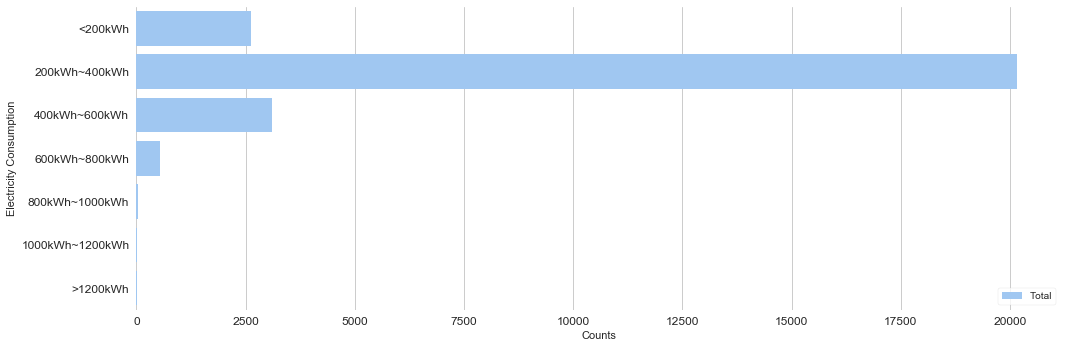

In [15]:
# 指定主題的風格參數
sns.set(style="whitegrid",context='notebook')

# 設置圖表大小
f, ax = plt.subplots(figsize=(15, 5))

# 繪製長條圖(barplot)
sns.set_color_codes("pastel")
# 設定x軸變量為Counts,y軸變量為Electricity Consumption。
sns.barplot(x="Counts", y="Electricity Consumption", data=df, label="Total", color="b")

# 新增圖例和座標軸，frameon:是否繪製圖像邊緣
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Electricity Consumption", xlabel="Counts")
sns.despine(left=True, bottom=True)

ax.tick_params(axis='x',labelsize=12) # x轴
ax.tick_params(axis='y',labelsize=12) # y轴

# 顯示圖表
plt.tight_layout()
plt.show()

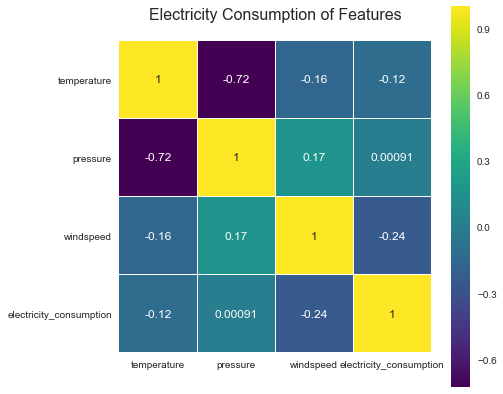

In [16]:
data = data[['temperature','pressure', 'windspeed','electricity_consumption']]

# 分析特徵的兩兩相關
colormap = plt.cm.viridis
plt.figure(figsize=(7,7))
plt.title('Electricity Consumption of Features', y=1.05, size=16)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

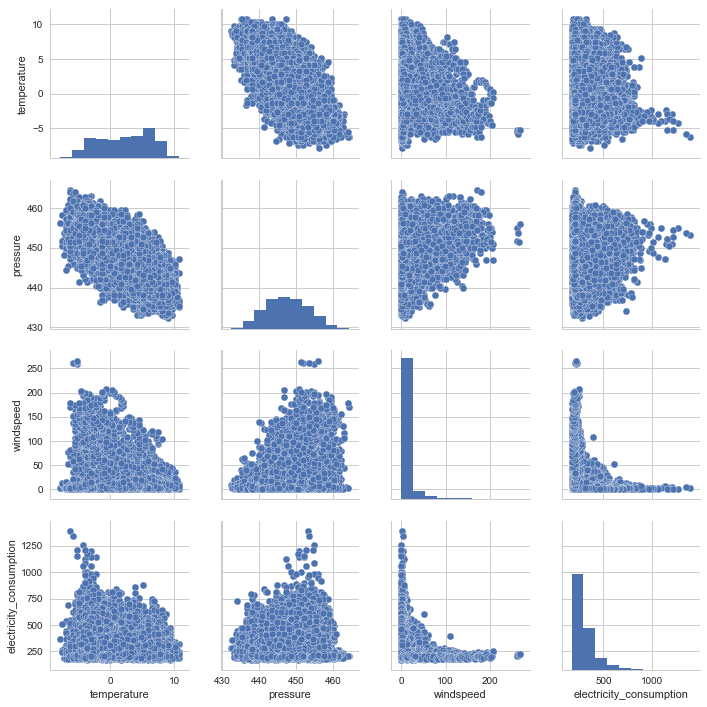

In [17]:
# 分析特徵的兩兩相關
sns.pairplot(data)
plt.show()